In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [9]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Class
0    284315
1       492
Name: count, dtype: int64


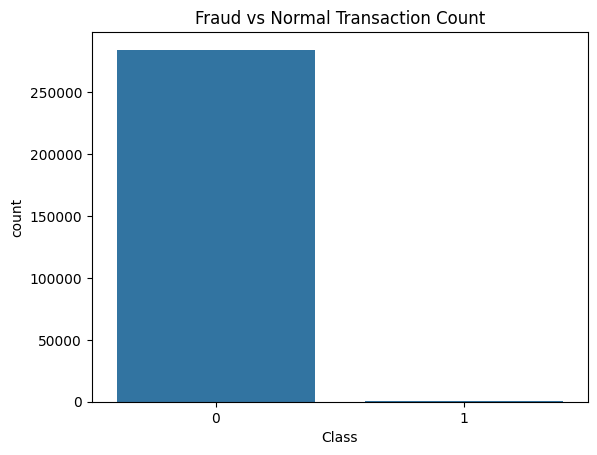

In [10]:
print(df['Class'].value_counts())

sns.countplot(x='Class', data=df)
plt.title("Fraud vs Normal Transaction Count")
plt.show()

In [11]:
# Split features and labels
X = df.drop('Class', axis=1)
y = df['Class']

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape

((227845, 30), (56962, 30))

In [13]:
# Oversampling minority class using SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

# Check new class balance
y_res.value_counts()


Class
0    227451
1    227451
Name: count, dtype: int64

In [16]:
model = RandomForestClassifier(
    n_estimators=50,  
    random_state=42,
    n_jobs=-1          
)

model.fit(X_res, y_res)
y_pred = model.predict(X_test)


In [17]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred))

Confusion Matrix:
 [[56855     9]
 [   17    81]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.90      0.83      0.86        98

    accuracy                           1.00     56962
   macro avg       0.95      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962


ROC-AUC Score: 0.9131861699378682


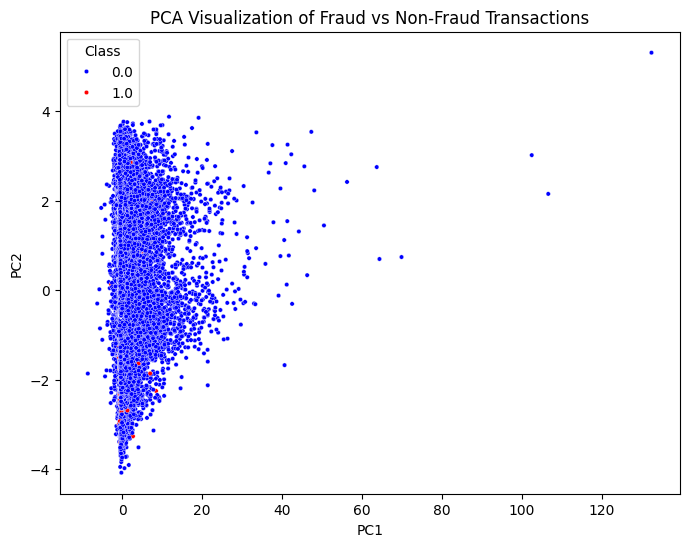

In [18]:
from sklearn.decomposition import PCA

# Apply PCA to reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a new DataFrame for visualization
df_pca = pd.DataFrame(np.vstack((X_pca.T, y)).T, columns=["PC1", "PC2", "Class"])

# Plot PCA results
plt.figure(figsize=(8,6))
sns.scatterplot(x="PC1", y="PC2", hue="Class", data=df_pca, palette=["blue","red"], s=10)
plt.title("PCA Visualization of Fraud vs Non-Fraud Transactions")
plt.show()

# Credit Card Fraud Detection Using Machine Learning

## Introduction
- Problem definition
- Imbalance explanation

## Dataset Overview
- 284,807 rows
- 492 fraud cases (<0.2%)

## EDA
- Class imbalance visual
- Key observations

## Model Training + SMOTE
- Why oversampling
- Random Forest results

## Results + Metrics Interpretation
- Precision, Recall, ROC-AUC

## PCA Visualization
- What does visualization reveal?


## Conclusion

In this project, a machine learning model was developed to detect credit card fraud. The dataset was highly imbalanced with less than 0.2% fraud cases, so SMOTE oversampling was applied to balance the classes. A Random Forest classifier was trained and achieved:

Accuracy: ~99%

Precision (fraud class): ~0.90

Recall (fraud class): ~0.83

ROC-AUC: ~0.91

## High recall ensures more fraudulent transactions are caught.
## Precision shows only a few normal transactions are wrongly flagged as fraud.

## Key Takeaways

Handling class imbalance is crucial in fraud detection.

Random Forest performs well due to robustness and nonlinear decision boundaries.

Visualizing PCA confirms fraud cases form different patterns than normal ones.

## Future Enhancements

Try XGBoost, LightGBM, or Neural Networks

Add cost-sensitive learning for fraud-heavy penalties

Deploy model using a Web UI or REST API